# Coursework 2 for Cardiac MR Image Segmentation (2020-2021)

Implementation of SegNet-like architecture

In [6]:
from matplotlib import pyplot as plt
def show_image_mask(img, mask, cmap='gray'): # visualisation
    fig = plt.figure(figsize=(5,5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap=cmap)
    plt.axis('off')
    
def show_image_mask_pred(img, mask, pred, cmap='gray'): # visualisation
    fig = plt.figure(figsize=(5,5))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap=cmap)
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(pred, cmap=cmap)
    plt.axis('off')
    plt.show()

In [35]:
import torch
import torch.utils.data as data
import cv2
import os
from glob import glob
import numpy as np

class TrainDataset(data.Dataset):
    def __init__(self, root=''):
        super(TrainDataset, self).__init__()
        self.img_files = glob(os.path.join(root,'image','*.png'))
        self.mask_files = []
        for img_path in self.img_files:
            basename = os.path.basename(img_path)
            self.mask_files.append(os.path.join(root,'mask',basename[:-4]+'_mask.png'))
            

    def __getitem__(self, index):
            img_path = self.img_files[index]
            mask_path = self.mask_files[index]
            data = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
            label = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)
            return torch.from_numpy(data).float(), torch.from_numpy(label).float()

    def __len__(self):
        return len(self.img_files)

class TestDataset(data.Dataset):
    def __init__(self, root=''):
        super(TestDataset, self).__init__()
        self.img_files = glob(os.path.join(root,'image','*.png'))

    def __getitem__(self, index):
            img_path = self.img_files[index]
            data = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
            return torch.from_numpy(data).float()

    def __len__(self):
        return len(self.img_files)


In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNSEG(nn.Module): # Define your model
    def __init__(self):
        super(CNNSEG, self).__init__()
        # fill in the constructor for your model here
        self.encoder_00 = nn.Sequential(*[nn.Conv2d(in_channels=1,out_channels=64,kernel_size=3,padding=1),
                                                nn.BatchNorm2d(64)])
        
        self.encoder_01 = nn.Sequential(*[nn.Conv2d(in_channels=64,out_channels=64,kernel_size=3,padding=1),
                                                nn.BatchNorm2d(64)])
        
        self.encoder_10 = nn.Sequential(*[nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,padding=1),
                                                nn.BatchNorm2d(128)])
        
        self.encoder_11 = nn.Sequential(*[nn.Conv2d(in_channels=128,out_channels=128,kernel_size=3,padding=1),
                                                nn.BatchNorm2d(128)])
        
        self.encoder_20 = nn.Sequential(*[nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3,padding=1),
                                                nn.BatchNorm2d(256)])
        
        self.encoder_21 = nn.Sequential(*[nn.Conv2d(in_channels=256,out_channels=256,kernel_size=3,padding=1),
                                                nn.BatchNorm2d(256)])
        
        self.encoder_22 = nn.Sequential(*[nn.Conv2d(in_channels=256,out_channels=256,kernel_size=3,padding=1),
                                                nn.BatchNorm2d(256)])
        
        self.encoder_30 = nn.Sequential(*[nn.Conv2d(in_channels=256,out_channels=512,kernel_size=3,padding=1),
                                                nn.BatchNorm2d(512)])
        
        self.encoder_31 = nn.Sequential(*[nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,padding=1),
                                                nn.BatchNorm2d(512)])
        
        self.encoder_32 = nn.Sequential(*[nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,padding=1),
                                                nn.BatchNorm2d(512)])
        
        self.encoder_40 = nn.Sequential(*[nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,padding=1),
                                                nn.BatchNorm2d(512)])
        
        self.encoder_41 = nn.Sequential(*[nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,padding=1),
                                                nn.BatchNorm2d(512)])
        
        self.encoder_42 = nn.Sequential(*[nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,padding=1),
                                                nn.BatchNorm2d(512)])
        
        #Decoder
        
        
        self.decoder_42 = nn.Sequential(*[nn.ConvTranspose2d(in_channels=512,out_channels=512,kernel_size=3,padding=1),
                                                nn.BatchNorm2d(512)])
        
        self.decoder_41 = nn.Sequential(*[nn.ConvTranspose2d(in_channels=512,out_channels=512,kernel_size=3,padding=1),
                                                nn.BatchNorm2d(512)])
        
        self.decoder_40 = nn.Sequential(*[nn.ConvTranspose2d(in_channels=512,out_channels=512,kernel_size=3,padding=1),
                                                nn.BatchNorm2d(512)])
        
        self.decoder_32 = nn.Sequential(*[nn.ConvTranspose2d(in_channels=512,out_channels=512,kernel_size=3,padding=1),
                                                nn.BatchNorm2d(512)])
        
        self.decoder_31 = nn.Sequential(*[nn.ConvTranspose2d(in_channels=512,out_channels=512,kernel_size=3,padding=1),
                                                nn.BatchNorm2d(512)])
        
        self.decoder_30 = nn.Sequential(*[nn.ConvTranspose2d(in_channels=512,out_channels=256,kernel_size=3,padding=1),
                                                nn.BatchNorm2d(256)])
        
        self.decoder_22 = nn.Sequential(*[nn.ConvTranspose2d(in_channels=256,out_channels=256,kernel_size=3,padding=1),
                                                nn.BatchNorm2d(256)])
        
        self.decoder_21 = nn.Sequential(*[nn.ConvTranspose2d(in_channels=256,out_channels=256,kernel_size=3,padding=1),
                                                nn.BatchNorm2d(256)])
        
        self.decoder_20 = nn.Sequential(*[nn.ConvTranspose2d(in_channels=256,out_channels=128,kernel_size=3,padding=1),
                                                nn.BatchNorm2d(128)])
        
        self.decoder_11 = nn.Sequential(*[nn.ConvTranspose2d(in_channels=128,out_channels=128,kernel_size=3,padding=1),
                                                nn.BatchNorm2d(128)])
        
        self.decoder_10 = nn.Sequential(*[nn.ConvTranspose2d(in_channels=128,out_channels=64,kernel_size=3,padding=1),
                                                nn.BatchNorm2d(64)])
        
        self.decoder_01 = nn.Sequential(*[nn.ConvTranspose2d(in_channels=64,out_channels=64,kernel_size=3,padding=1),
                                                nn.BatchNorm2d(64)])
        
        self.decoder_00 = nn.Sequential(*[nn.ConvTranspose2d(in_channels=64,out_channels=4,kernel_size=3,padding=1)])
        
        
    def forward(self, x):
        # fill in the forward function for your model here
        # Encoder

        # Encoder Stage - 1
        dim_0 = x.size()
        x_00 = F.relu(self.encoder_00(x))
        x_01 = F.relu(self.encoder_01(x_00))
        x_0, indices_0 = F.max_pool2d(x_01, kernel_size=2, stride=2, return_indices=True)

        # Encoder Stage - 2
        dim_1 = x_0.size()
        x_10 = F.relu(self.encoder_10(x_0))
        x_11 = F.relu(self.encoder_11(x_10))
        x_1, indices_1 = F.max_pool2d(x_11, kernel_size=2, stride=2, return_indices=True)

        # Encoder Stage - 3
        dim_2 = x_1.size()
        x_20 = F.relu(self.encoder_20(x_1))
        x_21 = F.relu(self.encoder_21(x_20))
        x_22 = F.relu(self.encoder_22(x_21))
        x_2, indices_2 = F.max_pool2d(x_22, kernel_size=2, stride=2, return_indices=True)
        
        # Encoder Stage - 4
        dim_3 = x_2.size()
        x_30 = F.relu(self.encoder_30(x_2))
        x_31 = F.relu(self.encoder_31(x_30))
        x_32 = F.relu(self.encoder_32(x_31))
        x_3, indices_3 = F.max_pool2d(x_32, kernel_size=2, stride=2, return_indices=True)
        
        # Encoder Stage - 5
        dim_4 = x_3.size()
        x_40 = F.relu(self.encoder_40(x_3))
        x_41 = F.relu(self.encoder_41(x_40))
        x_42 = F.relu(self.encoder_42(x_41))
        x_4, indices_4 = F.max_pool2d(x_42, kernel_size=2, stride=2, return_indices=True)

        # Decoder

        dim_d = x_4.size()

        # Decoder Stage - 5
        x_4d = F.max_unpool2d(x_4, indices_4, kernel_size=2, stride=2, output_size=dim_4)
        x_42d = F.relu(self.decoder_42(x_4d))
        x_41d = F.relu(self.decoder_41(x_42d))
        x_40d = F.relu(self.decoder_40(x_41d))
        dim_4d = x_40d.size()
        
        # Decoder Stage - 4
        x_3d = F.max_unpool2d(x_40d, indices_3, kernel_size=2, stride=2, output_size=dim_3)
        x_32d = F.relu(self.decoder_32(x_3d))
        x_31d = F.relu(self.decoder_31(x_32d))
        x_30d = F.relu(self.decoder_30(x_31d))
        dim_3d = x_30d.size()
        
        # Decoder Stage - 3
        x_2d = F.max_unpool2d(x_30d, indices_2, kernel_size=2, stride=2, output_size=dim_2)
        x_22d = F.relu(self.decoder_22(x_2d))
        x_21d = F.relu(self.decoder_21(x_22d))
        x_20d = F.relu(self.decoder_20(x_21d))
        dim_2d = x_20d.size()

        # Decoder Stage - 2
        x_1d = F.max_unpool2d(x_20d, indices_1, kernel_size=2, stride=2, output_size=dim_1)
        x_11d = F.relu(self.decoder_11(x_1d))
        x_10d = F.relu(self.decoder_10(x_11d))
        dim_1d = x_10d.size()

        # Decoder Stage - 1
        x_0d = F.max_unpool2d(x_10d, indices_0, kernel_size=2, stride=2, output_size=dim_0)
        x_01d = F.relu(self.decoder_01(x_0d))
        x_00d = self.decoder_00(x_01d)
        dim_0d = x_00d.size()

        x_softmax = F.softmax(x_00d, dim=1)

        return x_softmax

model = CNNSEG() # We can now create a model using your defined segmentation model
try:
    weights = torch.load('./segnet.pth')
    model.load_state_dict(weights[0])
    best_val = weights[1]
except:
    best_val = 100

In [28]:
LEARNING_RATE = 0.001

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                                     lr=LEARNING_RATE)
train_loss = list()
val_loss = list()

In [29]:
def forward(img):

    img_scale = img/255.

    img_scale = img_scale.unsqueeze(1)
    optimizer.zero_grad()
    seg_soft = model(img_scale)
    
    return seg_soft

----------
Epoch 1/100


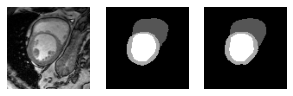

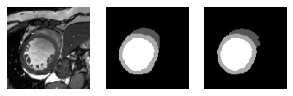

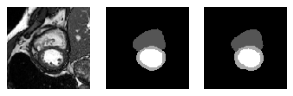

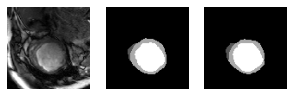

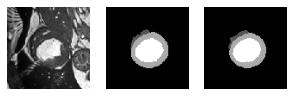

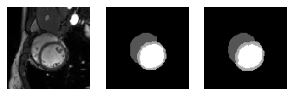

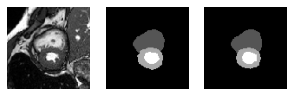

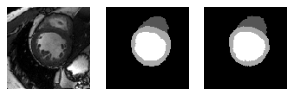

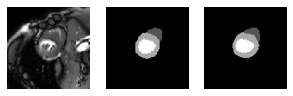

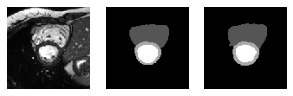

Train loss:  0.7565044462680817  Training took  32.95794992300034  seconds
Validation loss:  0.7989366054534912 Validating took  2.699413670001377  seconds
Dice score:  0.929845497964914
----------
Epoch 2/100


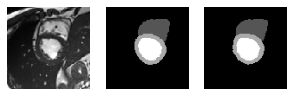

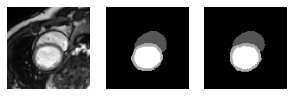

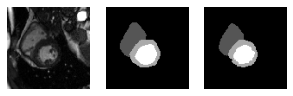

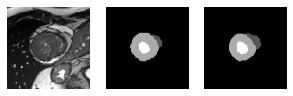

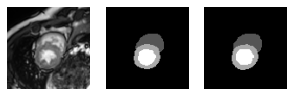

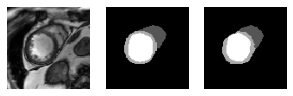

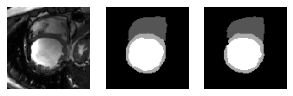

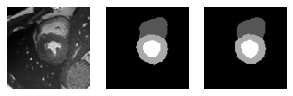

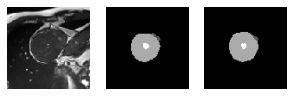

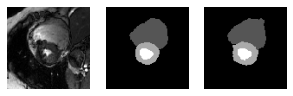

Train loss:  0.755937135219574  Training took  35.13675961300032  seconds
Found better
Validation loss:  0.7841857671737671 Validating took  2.8938178030002746  seconds
Dice score:  1.1346417258914876
----------
Epoch 3/100


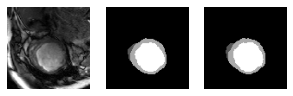

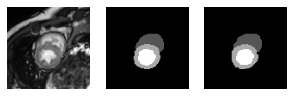

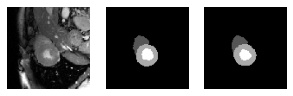

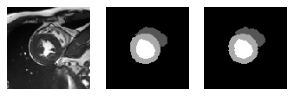

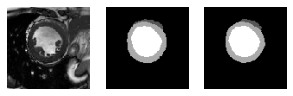

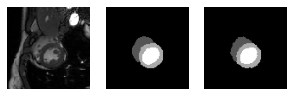

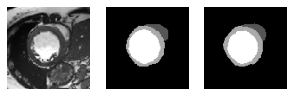

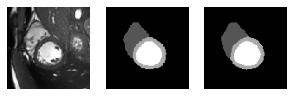

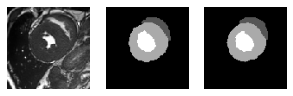

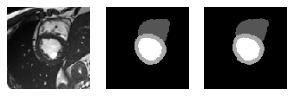

Train loss:  0.7543395817279815  Training took  33.54847055400023  seconds
Validation loss:  0.7854313254356384 Validating took  2.557623799999419  seconds
Dice score:  1.1225592070603014
----------
Epoch 4/100


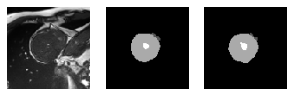

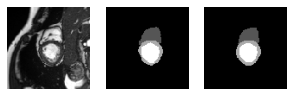

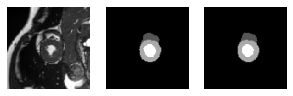

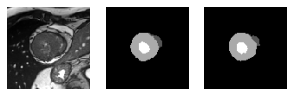

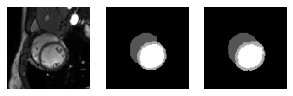

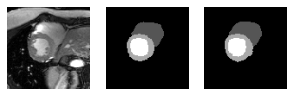

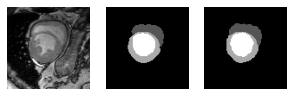

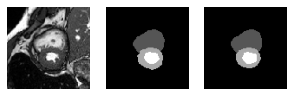

KeyboardInterrupt: 

In [46]:
from torch.utils.data import DataLoader
import time

data_path = './data/train'
val_path = './data/val'
num_workers = 8
batch_size = 10
train_set = TrainDataset(data_path)
val_set = TrainDataset(val_path)

training_data_loader = DataLoader(dataset=train_set, num_workers=num_workers, batch_size=batch_size, shuffle=True)
validating_data_loader = DataLoader(dataset=val_set, num_workers=num_workers, batch_size=20, shuffle=True)


data_loader = {'train':training_data_loader,
              'validate':validating_data_loader}
EPOCHS = 100

# Fetch images and labels. 
for epochs in range(EPOCHS):
    print('-' * 10)
    print('Epoch {}/{}'.format(epochs+1, EPOCHS))

    model.train(True)
    tic = time.perf_counter()
    batch_loss = 0.0

    for index_train, sample in enumerate(data_loader['train']):
        
        img, mask = sample
        
        soft_mask = forward(img)
        
        predicted_mask = torch.argmax(soft_mask, dim=1)[0,...].squeeze().float()
        
        show_image_mask_pred(img[0,...].squeeze(), mask[0,...].squeeze(), predicted_mask)
        
        loss = loss_fn(soft_mask, mask.long())

        loss.backward()
        optimizer.step()

        batch_loss += loss.item()

    train_loss.append(batch_loss / (index_train + 1))
    toc = time.perf_counter()
    print("Train loss: ", train_loss[-1], " Training took ", toc-tic, " seconds")
    model.train(False)

    batch_loss = 0.0
    tic = time.perf_counter()
    for index_val, sample in enumerate(data_loader['validate']):
        img, mask = sample
        soft_mask = forward(img)
       
        loss = loss_fn(soft_mask, mask.long())

        batch_loss += loss.item()

    val_loss.append(batch_loss / (index_val + 1))
    toc = time.perf_counter()
    dice_scr = (categorical_dice(mask ,torch.argmax(soft_mask, dim=1)[0,...].squeeze().float(), 0) + 
                   categorical_dice(mask ,torch.argmax(soft_mask, dim=1)[0,...].squeeze().float(), 2) + 
                   categorical_dice(mask ,torch.argmax(soft_mask, dim=1)[0,...].squeeze().float(), 3))/3
    if val_loss[-1] < best_val:
        torch.save([model.state_dict(), val_loss[-1]], './segnet.pth')
        best_val = val_loss[-1]
        print("Found better")
    print("Validation loss: ", val_loss[-1], "Validating took ", toc-tic, " seconds")
    print("Dice score: ", dice_scr)

In [43]:
torch.argmax(soft_mask, dim=1)[0,...].squeeze().float()[55]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 2., 2., 2.,
        2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.])

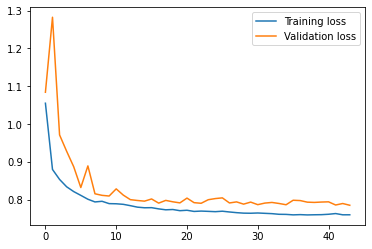

In [31]:
plt.plot(train_loss, label="Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.show()

In [36]:
def categorical_dice(mask1, mask2, label_class=1):
    """
    Dice score of a specified class between two volumes of label masks.
    (classes are encoded but by label class number not one-hot )
    Note: stacks of 2D slices are considered volumes.

    Args:
        mask1: N label masks, numpy array shaped (H, W, N)
        mask2: N label masks, numpy array shaped (H, W, N)
        label_class: the class over which to calculate dice scores

    Returns:
        volume_dice
    """
    mask1_pos = (mask1 == label_class).numpy()
    mask2_pos = (mask2 == label_class).numpy()
    dice = 2 * np.sum(mask1_pos * mask2_pos) / (np.sum(mask1_pos) + np.sum(mask2_pos))
    return dice

In [45]:
categorical_dice(mask, torch.argmax(soft_mask, dim=1))
#categorical_dice(mask[0,...].squeeze(), mask[0,...].squeeze())

0.7748446249461571

In [17]:
torch.save([model.state_dict(), 0.123], './segnet_test.pth')

In [23]:
m = torch.load('./segnet_test.pth')

In [26]:
m[1]

0.123

In [13]:
model.load_state_dict(m)

<All keys matched successfully>

In [23]:
data_path = './data/test'
num_workers = 8
batch_size = 1
test_set = TestDataset(data_path)

test_data_loader = DataLoader(dataset=test_set, num_workers=num_workers, batch_size=batch_size, shuffle=True)

In [20]:
trained_model = CNNSEG()
best_weights = torch.load('./segnet.pth')
trained_model.load_state_dict(best_weights[0])
trained_model.eval()

for iteration, sample in enumerate(training_data_loader):
    img = sample[0]
    img_scale = img/255.
    #show_image_mask(img[0,...].squeeze(), mask[0,...].squeeze()) #visualise all data in training set
    plt.pause(1)

    # Write your FORWARD below
    # Note: Input image to your model and ouput the predicted mask and Your predicted mask should have 4 channels

    img_scale = img_scale.unsqueeze(1)
    seg_soft = trained_model(img_scale)

    show_image_mask(img[0,...].squeeze(), torch.argmax(seg_soft, dim=1)[0,...].squeeze().float())
    

KeyboardInterrupt: 

In [50]:
from torchsummary import summary
summary(model, (1, 96, 96))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 96, 96]             640
       BatchNorm2d-2           [-1, 64, 96, 96]             128
            Conv2d-3           [-1, 64, 96, 96]          36,928
       BatchNorm2d-4           [-1, 64, 96, 96]             128
            Conv2d-5          [-1, 128, 48, 48]          73,856
       BatchNorm2d-6          [-1, 128, 48, 48]             256
            Conv2d-7          [-1, 128, 48, 48]         147,584
       BatchNorm2d-8          [-1, 128, 48, 48]             256
            Conv2d-9          [-1, 256, 24, 24]         295,168
      BatchNorm2d-10          [-1, 256, 24, 24]             512
           Conv2d-11          [-1, 256, 24, 24]         590,080
      BatchNorm2d-12          [-1, 256, 24, 24]             512
           Conv2d-13          [-1, 256, 24, 24]         590,080
      BatchNorm2d-14          [-1, 256,